<a href="https://colab.research.google.com/github/cunhamaicon/recomendation_system/blob/master/recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Introdução

##Visão geral sobre sistemas de recomendação
### Da criação a implementação de um algoritmo de recomendação inteiramente novo
<br>

**Autor: Maicon Henrique Cunha**

**email: maiconhenrique@hotmail.com**

**Github: [https://github.com/cunhamaicon](https://github.com/cunhamaicon/)**




---




Quando você escuta uma música que nunca tinha escutado pelo spotify por seu perfil ser notificado a ouvir algo de seu interesse. Quando você assiste um seriado/filme no netflix ou qualquer outro serviço de streaming, baseado em uma recomendação do serviço. Nesse exato momento você está sofrendo a ação de um algoritmo de recomendação. Esse algoritmo pode levar em conta estatística, matemática, redes neurais, etc. Pode ser criado das formas mais distintas possíveis com o objetivo simples de captar o perfil do usuário e expandir seu universo de conhecimento de música/filme ou qualquer outro  interesse de maneira adequada. Falaremos sobre esse tipo específico de algoritmo: algoritmos de recomendação.
<br><br>
  
Em se tratando de algoritmos de recomendação é preciso medir quanto que um ou outro algoritmo é melhor ou pior,ou seja, como medir a precisão de um algoritmo de recomendação? Você já parou para se perguntar isso? Já encontrou alguma recomendação que não batia com o seu perfil nesses serviços que citei anteriormente? Pode acontecer. A resposta para essas e outras perguntas que irão surgir a medida que dissecarmos o problema da recomendação está um pouco mais adiante, e, talvez nem todas as perguntas tenham resposta!
<br><br>


Mostrarei de forma geral do que se trata o problema da recomendação e apresentarei uma abordagem já conhecida que se utiliza de auto-encoders, um tipo especial de rede neural. Porém, recomendação com auto-encoders não é o objetivo principal e não vou tomar muito do seu tempo nessa abordagem.  Baseado em uma observação simples construí um algoritmo de recomendação clássico inteiramente do zero, que pode ou não já ter semelhança com algum outro algoritmo existente, já que ainda não consegui ler sobre todos os algoritmos de recomendação existentes no mundo nesse instante e alguém pode ter pensado exatamente igual eu pensei. Pretendo mostrar o passo a passo do processo de criação desse algoritmo, sua implementação, bem como a sua aplicação em um banco de dados existente e sua precisão.
<br><br>

O banco de dados utilizado para teste foi o movielens com um milhão de avaliações de filmes retirado originalmente do site: [https://grouplens.org/datasets/movielens/](https://grouplens.org/datasets/movielens/). Porém, foi copiado para minha pasta do [github](https://github.com/cunhamaicon/recomendation_system) por questão de implementação. Apesar do banco de testes ser um banco de filmes e os exemplos seguirem esse modelo, nada impede a utilização do algoritmo proposto para outros fins.
<br><br>


O problema de criar um algoritmo inteiramente novo é desafiador, tanto pelo motivo de ter uma ideia original de algoritmo quanto pelo motivo de implementar e testar essa ideia. Além disso, será esse algoritmo suficientemente bom para ser aplicado na prática? Será que ele é melhor que os algoritmos já existentes? Será que a implementação é possível? Como fazer essa implementação? Será que o processo de recomendação leva muito tempo para ser executado? Pode um algoritmo clássico ser mais preciso do que um algoritmo que utiliza redes neurais? 
<br><br>


Todo o código presente nesse trabalho foi feito em python e pode ser executado online através do site:  [https://colab.research.google.com](https://colab.research.google.com), sendo esse um dos diferenciais desse trabalho, a interatividade. Além disso recomendo a utilização do colab para leitura por propiciar a possibilidade de esconder assuntos por título com um clique e não poluir o texto.
<br><br>

Se você não conhece nada de programação em python mas deseja saber mais sobre sistemas de recomendação, esse trabalho é para você, basta pular as partes que achar difícil. Se você é expert em algoritmos de recomendação usando auto-encoders, esse trabalho também é para você, basta pular as partes que achar fácil. Se você é curioso e quer saber como criar um algoritmo do zero, esse trabalho também é para você, basta procurar o assunto de interesse, as dificuldades encontradas no processo e a minha solução para os problemas. Se você é expert em python, também é bem vindo, mas lembre-se, todo o código que mostrarei aqui para a implementação do algoritmo proposto é apenas um esboço do que poderá ser uma versão mais robusta do algoritmo.  
<br><br>

Opiniões e sugestões são bem vindas. Boa leitura!

#2. Objetivos do Trabalho





1.   Introduzir o tema algoritmos de recomendação
2.   Explicar como medir a precisão de um algoritmo de recomendação
3.  Explicar o que são dados de treinamento e teste para algoritmos de recomendação
4. Apresentar os auto-encoders e mostrar a ideia que envolve a utilização dos mesmos para recomendação
5. **Criar um algoritmo de receomendação inteiramente novo**
6. Explicar os conceitos que envolvem o algoritmo de recomendação proposto
7. Mostrar as dificuldades no processo de criação e implementação do algoritmo proposto
8. **Implementar o algoritmo de recomedação proposto**
9. **Testar o algoritmo de recomendação proposto**
10. Apresentar as considerações finais e propostas de trabalhos futuros na área



#3. O problema de recomendação

## Criando um arquivo simples de avaliações de usuários sobre filmes

Utilizaremos o pandas para criar um arquivo simples de avaliações de usuários sobre filmes, bem menor que o encontrado no banco de dados que será utilizado, mas que será importante para visualizarmos o problema da recomendação. Esse exemplo segue o mesmo modelo do movielens, onde são dadas notas de um à cinco para os filmes.
<br><br>

Considere que cinco usuários avaliaram até sete filmes diferentes:
<br><br>

O "usuário 1" avaliou os filmes de códigos 2,3,4 e deu notas 4, 5 e 3 respectivamente.<br>
O "usuário 2" avaliou os filmes de códigos 1,2,3,4 e deu notas 4,5,3,2 respectivamente.<br>
O "usuário 3"  avaliou os filmes de códigos 1,2,3,4,5, e deu notas 3,2,5,5,5 respectivamente.<br>
O "usuário 4" avaliou os filmes de códigos 1,2,3 e deu notas 2,3,3 respectivamente.<br>
o "usuário 5" avaliou os filmes de códigos 4,7 e deu notas 4 e 5 respectivamente.

In [0]:
import pandas as pd

In [0]:
avaliacoes = [[1,2,4], [1,3,5], [1,4,3],
              [2,1,4], [2,2,5], [2,3,3], [2,4,2],
              [3,1,3],[3,2,2],[3,3,5],[3,4,5],[3,5,5],
              [4,1,2],[4,2,3],[4,3,3],
              [5,4,4],[5,7,5]]

In [0]:
df_avaliacoes = pd.DataFrame(avaliacoes, columns = ["Usuário", "Filme", "Nota"])

Vamos dar uma olhada no objeto dataframe do pandas criado:

In [188]:
df_avaliacoes

,Usuário,Filme,Nota
0,1,2,4
1,1,3,5
2,1,4,3
3,2,1,4
4,2,2,5
5,2,3,3
6,2,4,2
7,3,1,3
8,3,2,2
9,3,3,5


Em geral os banco de dados que são utilizados para recomendação estão no formato acima, ou podem ser transformados nesse formato. Porém, essa não é a melhor maneira de utilizar um banco de dados de avaliações. O formato útil é criar uma matriz A do tipo Usuário x Filme (em inglês UxM), onde cada linha representa um usuário e cada coluna representa um filme. Sendo o valor do elemento $a_{ij}$ da matriz a avaliação do usuário i sobre o filme j. Você seria capaz de criar a matriz usuário x filmes  do exemplo anterior? Confira a resposta a seguir. No decorrer do texto todo falaremos sobre esse tipo específico de matriz.

### Matrix UxM do exemplo:

In [0]:
import numpy as np

def create_uxm_matrix(dataframe,user,movie,rating):
    
    """Dado um objeto pandas do tipo dataframe composto por avaliações
    de usuários sobre filmes cujas colunas são user, movie e rating. Retorna
    uma matriz do tipo Users x Movies (UxM), onde cada linha representa um 
    usuário e cada coluna um filme com a respectiva avaliação do usuário 
    sobre o filme. Para filmes não avaliados a nota é zeero. As demais 
    notas variam entre um e quatro. """
    
    index_max_users = max(np.unique(dataframe.iloc[:,0].values))
    index_max_movies = max(np.unique(dataframe.iloc[:,1].values))
    uxm_matrix = np.zeros((index_max_users,index_max_movies))
    
    for id_user in range(1,index_max_users+1):
    
        movies_id = dataframe.loc[dataframe[user]==id_user][movie].values 
        ratings_id = dataframe.loc[dataframe[user]==id_user][rating].values    
    
        for id_movie in range(1,index_max_movies+1):
        
            if id_movie in movies_id:
            
                rating_user_movie = np.where(movies_id == id_movie)
                uxm_matrix[id_user-1,id_movie-1]=ratings_id[rating_user_movie]
    
    return uxm_matrix

In [0]:
A = create_uxm_matrix(df_avaliacoes,"Usuário","Filme","Nota")

In [190]:
print(A)

[[0. 4. 5. 3. 0. 0. 0.]
 [4. 5. 3. 2. 0. 0. 0.]
 [3. 2. 5. 5. 5. 0. 0.]
 [2. 3. 3. 0. 0. 0. 0.]
 [0. 0. 0. 4. 0. 0. 5.]]


## Matriz UxM

Dado um conjunto de avaliações de usuários sobre filmes, uma matriz A do tipo UxM é aquela onde cada linha representa um usuário e cada coluna representa um filme. Sendo o valor do elemento  $a_{ij}$  da matriz a avaliação do usuário i sobre o filme j, como no exemplo:

<br>

![](https://github.com/cunhamaicon/recomendation_system/blob/master/img/matriz_exemplo.png?raw=true)


Um algoritmo de recomendação é um programa que substitui os valores zero da matriz UxM com recomendações adequadas para cada usuário.
<br><br>
**Um algoritmo de recomendação é um algoritmo de completar tabelas!**

## Treinamento e Teste

Para verificar a precisão de um algoritmo de recomendação são criadas duas matrizes novas a partir da matriz UxM original de um banco de avaliações. Onde uma parte das avaliações é utilizada para a construção do algoritmo e outra parte é utilizada para testar a precisão do algoritmo, você pode pensar como treinamento e teste se está acostumado com a linguagem de machine learning. Seguindo a matriz UxM do exemplo anterior  selecionei alguns dados para treinamento (em azul) e outros para teste ( em vermelho):
<br>

![alt text](https://github.com/cunhamaicon/recomendation_system/blob/master/img/uxm_train_test.png?raw=true)

Matriz de treinamento: <br>

![alt text](https://github.com/cunhamaicon/recomendation_system/blob/master/img/uxm_train.png?raw=true)

Matriz de teste:<br>

![alt text](https://github.com/cunhamaicon/recomendation_system/blob/master/img/uxm_test.png?raw=true)

Um algoritmo com 100% de precisão conseguiria prever dada uma matriz de treinamento separada do conjunto original a matriz exata de teste. Sendo esse o objetivo para esse tipo de algoritmo. É  um jogo de completar tabela, aquele algoritmo que completar com menor erro vence.

##Auto-encoders e recomendação

Auto-encoders são um tipo específico de redes neurais com a seguinte estrutura:

![alt text](https://github.com/cunhamaicon/recomendation_system/blob/master/img/autoencoder.png?raw=true)

Primeiramente eles são simétricos e podem haver mais camadas intermediárias que a representada acima.
<br><br>
O treinamento de um auto-encoder consiste em apresentar um mesmo vetor na entrada e na saída da rede.  Realizar os procedimentos usuais de treinamento de uma rede neural. A entrada pode ser uma série temporal, uma imagem, um texto, literalmente qualquer coisa que se utilize de redes neurais. 
<br><br>
Mas qual o objetivo de se apresentar um mesmo vetor na entrada e na saída de uma rede?
<br><br>
Existem alguns motivos como: compactação e extração de propriedades de um conjunto.
<br><br>
Um exemplo sobre compactação e auto-encoders você encontra [aqui](https://probablydance.com/2016/04/30/neural-networks-are-impressively-good-at-compression/).

Como construir um auto-encoder utilizando o keras e mais exemplos você encontra [aqui](https://blog.keras.io/building-autoencoders-in-keras.html) . 
<br><br>
Atualmente auto-encoders são utilizados para reconstrução de imagens com ruído de forma eficiente.
<br><br>

Para utilizar auto-encoders como um sistema de recomendação basta treinar uma rede específica. Depois de treinada essa rede passa a ser o sistema de recomendação.
<br><br>

Como auto-encoders são bons para extração de propriedades de conjuntos a ideia é apresentar as recomendações de usuários de um conjunto de treinamento na entrada e na saída da rede, treinando os neurônios para reproduzir a mesma avaliaçao da entrada na saída da rede. Feito isso quando for apresentado um conjunto novo de dados ela seria capaz de extrair as propriedades intrísecas dos usuários e reproduzir também os dados de teste, completando a tabela, como já discutido anteriormente.
<br><br>

Futuramente exibirei o passo a passo da implementação de um sistema de recomendação utilizando auto-encoders. 
<br><br>

Os problemas de utilizar auto-encoders para fazer recomendação são os mesmo encontrados em uma rede neural comum. A tarefa de treinamento pode ser demorada, mas depois para fazer a previsão o processo é rápido.





## Ideia de um algoritmo clássico para o problema de recomendação





Pense sobre a seguinte frase:
<br><br>
**"Pessoas parecidas com um determinado perfil avaliam um determinado filme de forma semelhante."**
<br><br>

Você concorda com essa afirmação?<br><br>

Eu concordo, e, criei um algoritmo de recomendação clássico inteiramente novo baseado apenas nisso. Para um determinado filme que um usuário não avaliou vou olhar para aqueles usuários que estão mais "próximos" do perfil buscado. E, recomendar esse filme de acordo com a avaliação desses outros usuários que estão "próximos". <br><br>

Parece simples não é mesmo? Porém, o que siginfica ser "próximo" nesse contexto ? Como medir a distância entre dois usuários? Como atribuir a avaliação desses outro usuários próximos ao perfil desejado? Se ficou curioso não perca a próxima seção!

# 4.Proposta de um algoritmo clássico para recomendação

## Introdução

A criação desse algoritmo de recomendação é baseada na ideia de que usuários com perfil parecido avaliam os filmes de forma semelhante e que assim se um usuário não avaliou determinado filme, o algoritmo proposto vai sugerir uma avaliação baseada nas  avaliações dos demais usuários que estão próximos a esse perfil. Antes de discutir os detalhes desse algoritmo preste atenção na seguinte imagem, onde M representa todos os filmes que um usuário poderia avaliar. Em azul estão selecionados os filmes que ele realmente avaliou e em vermelho estão selecionados os filmes que ele não avaliou (aqueles que são passíveis de recomendação). <br><br>
![alt text](https://github.com/cunhamaicon/recomendation_system/blob/master/img/algoritmo_exemplo.png?raw=true)

G1 representa os filmes avaliados em comum com um grupo de usuários que está digamos entre os 10% mais próximos do usuário selecionado.<br>

G2 representa os filmes avaliados em comum com um grupo de usuários que está digamos entre os 20% mais próximos do usuário selecionado.<br><br>

Tente responder as seguintes perguntas:

1. Qual grupo você levaria em consideração para recomendar o filme M3 ao usuário? Repare que M3 está tanto em G1 como em G2.<br>
2. Qual grupo você levaria em consideração para recomendar o filme M5 ao usuário?<br>

3. Existe algum grupo possível para utilizar como recomendação do filme M7? <br>
4. Qual medida você utilizaria para utilizar como recomendação? <br><br>

Minhas resposta para essas perguntas são:



1.   Utilizar as avaliações do grupo G1 sobre o filme M3 como parâmetro para recomendar ao usuário, dado que o grupo G1 está mais próximo do perfil do usuário (10% < 20%).
2.   Utilizar as avaliações do grupo G2 sobre o filme M5 como parâmetro para recomendar ao usuário.
3. Utilizar algum outro parâmetro encontrado no banco todo, não somente nos grupos próximos para recomendar o filme M7.
4. Como já investiguei o banco de dados movielens, mas isso provavelmente é uma característica geral de qualquer banco de avaliações, percebi que tanto a média como a mediana são bons pontos de partida para  se fazer uma recomendação. Assim utilizaria a média de G1 sobre M3 para recomendar ao usuário o filme M3. A média de G2 sobre M5 para recomendar ao usuário o filme M5 e a média do banco todo sobre M7 para recomendar ao usuário o filme M7.
<br><br>

Suas respostas foram parecidas?
<br><br>

Perceba que nesse simples exemplo construímos uma espécie de filtro que começa pequeno e vai aumentando. De um grupo mais próximo para outro, e outro e por último olhamos para o banco todo.  Baseado em vários experimentos, essa solução aparentemente simples funcionou. Mas calma, nós não sabemo ainda nem comparar quando dois usuários estão próximos e isso é de fundamental importância.


## Calculando a distância entre dois usuários 

Existem alguns problemas para comparar usuários e determinar a distância entre eles dada uma matriz do tipo UxM:

1.   Número diferente de avaliações por usuário, alguns com pouquíssimas avaliações e outros com muitas;
2.   Para valores onde a matriz UxM é zero não houve avaliação alguma, portanto não faz sentido levar em consideração onde o usuário avaliou com zero para determinar a distância.

Vejamos alguns exemplos:
<br><br>

Considere os seguintes vetores:


$\vec{v} = (1,3,0, 4)$ , $\vec{w} = (1,3,0, 0)$ e  $\vec{r} = (2,3,0, 3)$

<br>
A distância euclidiana entre $\vec{v}$ e $\vec{w}$, $d(v,w) = \sqrt{(1-1)^2 + (3-3)^2 + (0-0)^2 + (4-0)^2} = 2$
<br><br>
A distância euclidiana entre $\vec{v}$ e $\vec{r}$, $d(v,r) = \sqrt{(2-1)^2 + (3-3)^2 + (0-0)^2 + (3-4)^2} = 1.4$

<br><br>

Do ponto de vista da geometria euclidiana $\vec{r} $ está mais próximo de $\vec{v} $ que $\vec{w} $ está. Agora, considere que esses vetores são avaliações de usuários sobre filmes. Faz sentido utilizar essa distância? Obviamente não pois $\vec{w} $ bateu exatamente com as avaliações de $\vec{v} $ nas duas primeiras posições e deveria estar mais próximo.
<br><br>
Para contornar esse problema da distância no algoritmo proposto, primeiramente determino um número mínimo de avaliações em comum para comparar dois usuários, caso esse número não seja atingido não posso nem comparar dois usuários. Em seguida calculo a distância apenas onde os dois vetores são não nulos, ou seja, apenas onde os usuários possuem avaliações em comum.
<br><br>

No exemplo citado anteriormente o cálculo dessa nova distância resultaria em:
<br><br>

A distância nova entre $\vec{v}$ e $\vec{w}$, $d(v,w) = \sqrt{(1-1)^2 + (3-3)^2 } = 0$
<br><br>
A distância nova entre $\vec{v}$ e $\vec{r}$, $d(v,r) = \sqrt{(2-1)^2 + (3-3)^2 +  (3-4)^2} = 1.4$
<br><br>


Com essa nova distância proposta verificamos que $\vec{w} $ está mais próximo de $\vec{v} $, o que era esperado para o problema em questão. 
<br><br>

Essa função distância e outras necessárias para a execução do algoritmo foram feitas em python e pode ser encontradas na seção "Programação" com mais detalhes. A partir desse momento sempre que mencionar distância entre usuários estarei mencionando essa distância específica e não a distância usual.


## O problema da negligência

Olhando ainda para a figura:

![alt text](https://github.com/cunhamaicon/recomendation_system/blob/master/img/algoritmo_exemplo.png?raw=true)

Com já discutido anteriormente minha solução para recomendar o filme M3 ao usuário foi utilizar a média das recomendações do grupo G1. Porém, mesmo com o grupo G1 considerado sendo os 10% mais próximos , a quantidade de usuários de G1 pode variar bastante, assim como a quantidade de usuários em G1 que avaliou o filme M3. 
<br><br>

Suponha que dentro de G1 apenas um único usuário tenha avaliado o filme M3 em um momento de desatenção e tenha dado uma avaliação "errada". Como só existe uma avaliação de M3, a média é essa própria avaliação e caso esse valor seja utilizado para recomendação ele provavelmente vai provocar um erro no processo. Por isso faz sentido exigir um número mínimo de avaliações dentro de um grupo para que um filme tenha sua recomendação realizada ao usuário. 
<br><br>

Nos testes que serão feitos posteriormente eu considerei três um número mínimo para calcular a média e recomendar o filme, mas isso pode depender do banco de dados utilizado, ou do objetivo da recomendação. A ideia que envolve utilizar esse parâmetro mínimo é evitar esses erros de negligência, ou ao menos diminuir o impacto deles na recomendação.


## O problema da média/mediana

Considere os seguintes vetores já observados quando falamos sobre o problema da distância entre dois usuários:
<br><br>
$\vec{v} = (1,3,0, 4)$ , $\vec{w} = (1,3,0, 0)$ e  $\vec{r} = (2,3,0, 3)$
<br><br>

Suponha que você queira obter a média em cada posição dos vetores acima. Temos:
<br><br>

média $(\vec{v}, \vec{w}, \vec{r})$ = (1+1+1,3+3+3,0+0+0,4+0+3)/3 = (1,3,2.3)
<br><br>

Porém levando em consideração que cada um desses vetores são avaliações de usuários sobre filmes, não faz muito sentido falar que 2.3 representa a média das avaliações da última posição. Para contornar esse problema vou considerar a média apenas onde foi feita avaliação, ou seja, apenas onde os valores são maiores que zero. Nesse caso o novo cálculo da média se torna: 
<br><br>
média $(\vec{v}, \vec{w}, \vec{r})$ = ((1+1+1)/3,(3+3+3)/3,0,(4+3)/2 = (1,3,3.5)
<br><br>
Que para esse problema faz mais sentido. Portanto, a partir de agora sempre que ouvir "média" é sobre essa operação que estamos falando.
<br><br>
Detalhes da implementação dessa função podem ser encontrados na seção "Programação".
<br><br>

Obs: o mesmo tipo de observação vale caso você queira considerar a mediana em detrimento da média.

Como um segundo exemplo vamos calcular a média proposta da seguinte matriz:

![](https://github.com/cunhamaicon/recomendation_system/blob/master/img/matriz_exemplo.png?raw=true)



Média = [3, 3.5 , 4, 3.5, 5, 0, 5]

## Algoritmo de recomendação proposto 

Considere um banco de dados de avaliações de usuários sobre filmes. Segue o Algoritmo de recomendação proposto:


---


Variáveis:

$X$: usuário

$m_X$: lista de filmes avaliados por $X$

$n$: número de grupos/filtros

$nmin$: número de filmes em comum para comparar dois usuários

$nmingrupo$: número de mínimo de filmes em uma lista de usuários para um determinado filme sofrer a ação de recomendação do grupo  

---



Início:

>Selecione um usuário $X$ e sua lista $m_X$ de filmes já avaliados .

>Determine uma lista $L$ contendo todos os usuários desse banco com $nmin$ avaliações em comum com $X$. 

>Ordene a lista $L$ de acordo com a distância de cada usuário em $L$ com $X$, do mais próximo para o mais afastado.

>Considere $t :$ tamanho da lista $L$ 

>Construa $n$ novas listas a partir de $L$ denominadas $L_1, L_2, L_3,..., L_n$ até os índices $t_1, t_2, t_3,...,t_n$ de $ L$ , com $t_1<t_2<t_3<... < t_n<t$ . 

>Para cada lista $L_i$ determine uma lista de filmes $m_i$ com um número mínimo $nmingrupo$ de avaliações em $L_i$.

>Para cada par $\{L_i, m_i\}$ construa a recomendação $r_i$ dos filmes em $m_i$
 a partir da média dos filmes em $m_i$ no grupo $L_i$. 
 
>Considere $m*$ a média de todos os filmes avaliados no banco.

>Para filme no banco e usuário $X$:

>>Se filme está em $m_X$:  
      
>>>retorne a própria avaliação de $X$ sobre filme
      
>>>vai para o próximo filme
            
>>Senão:
>>>Para $i$ indo de  $1$até $n:$
      
>>>>Se filme está em $m_i$:
      
>>>>>retorna a avaliação de filme dada por $r_i$
      
>>>>>vai para o próximo filme
      
>>Senão :
      
>>>retorna a avalição de filme dada por $m*$
      
 >>>vai para o próximo filme. 


Fim


---



###Observações:

1. A "distância" considerada nesse algoritmo foi discutida anteriormente. Assim como a "média". Que não são média e distância usuais. 
2.   Esse é um algoritmo geral, para exemplificar e implementar o algoritmo considerei apenas três grupos diferentes, n = 3.
3. O algoritmo faz a avaliação apenas para um usuário. Para avaliar o banco inteiro é necessário repetir o processo para os demais usuários




### Explicando o algoritmo

Primeiramente temos que definir um parâmetro mínimo de comparação entre dois usuários ($nmin$) e dado um usuário selecionar todos os demais que possuem esse número mínimo de avaliações em comum, armazenando esses usuários na lista $L$. Esse valor depende do banco avaliado, do número mínimo de avaliações que um usuário qualquer do banco possui. Com um valor muito pequeno de $nmin$ pode não ser possível captar a essência do algoritmo que é buscar perfis semelhantes, já um valor muito alto pode limitar o número de usuários a ponto de não ser possível extrair informações dos grupos formados. 
<br><br>
Entendido o que é a lista $L$ é preciso comparar os usuários de $L$ com $X$, para isso será utilizada uma distância entre $L$ e $X$. Ordenando assim a lista $L$ de acordo com o grau de proximidade com $X$, do mais próximo para o mais afastado.
<br><br>
  
Para simplificar vou pegar um exemplo. Vamos supor que $L$ seja uma lista de 100 usuários, $L$ = $u_1, u_2, ..., u_{100}$ e que eu tenha escolhido como número de grupos o valor 3. Ou seja, vou separar esses usuários em 3 novas listas: $L_1,L_2,L_3$.  
<br>

Na lista $L_1$ vou colocar os primeiros 10% usuários mais próximos de $X$. 
$L_1 =u_1,u_2,....,u_{10}$ 
<br>
Na lista $L_2$ vou colocar os primeiros 20% usuários mais próximos de $X$. 
$L_1 =u_1,u_2,....,u_{20}$
<br>
Na lista $L_3$ vou colocar os primeiros 40% usuários mais próximos de $X$. 
$L_1 =u_1,u_2,....,u_{40}$ 
<br><br>

Separado os usuários próximos em grupos de interesse vou olhar dentro desses grupos e anotar os filmes que foram avaliados pelo menos $nmingrupo$ vezes. Esse procedimento é realizado por causa do problema da negligência citado anteriormente.  Então para a lista $L_1$ determino a lista de filmes $m_1,$ seguindo esse critério. Para a lista $L_2$ determino a lista de filmes $m_2$. Para a lista $L_3$ determino a lista de filmes $m_3$.
<br><br>
Para o par $\{L_1,m_1\}$ construo o conjunto de recomendações $r_1$ composto por recomendações de filmes baseado na média das avaliações de $L_1$ sobre os filmes de $m_1$. De forma análoga são construídos os conjuntos de avaliações $r_2$ e $r_3$.
<br><br>

Como os grupos foram separados dos usuários mais próximos para os mais afastados, a precisão de uma recomendação no grupo de usuários $L_1$ é maior que em $L_2$, que por sua vez é maior que em $L_3$. Portanto quando eu for recomendar um filme para um usuário, primeiro vou olhar para o grupo $L_1$. Se esse filme está na lista $m_1$ sua avalição está em $r_1$ e vou tomar essa avaliação para recomendar ao usuário $X$. Se esse filme não estiver em $m_1$, vou olhar para a lista $m_2$, caso esteja em $m_2$ vou utilizar sua avalição que se encontra em $r_2$. Caso o filme não esteja em $m_2$, vou olhar para a lista $m_3$.Caso esteja em $m_3$ vou utilizar sua avalição que se encontra em $r_3$. Por último, caso o determinado filme não esteja em nenhuma das listas, vou utilizar a média das recomendações do banco sobre o filme. Dessa forma todo filme passa a sofrer um processo de recomendação para o usuário $X$.
 



# 5. Programação

Nessa seção são apresentadas todas as funções utilizadas na implementação do algoritmo proposto.

## Importação de pacotes

In [0]:
import pandas as pd
import numpy as np
import random
import time

## Funções

### Criação da matriz UxM

As avaliações de usuários sobre filmes/músicas costumam ser armazendas em tabelas onde cada linha contém uma referência ao usuário, que pode ser um código ou um índice, seguida do código do filme e da avaliação do usuário sobre o filme. A função seguinte considera que essa tabela já está no formato dataframe do pandas, e, a partir desse objeto cria uma matriz do tipo User x Movie (UxM) já discutida anteriormente. Essa matriz diferentemente do objeto anterior lista todos os filmes possíveis em coluna e todos os usuários que fizeram alguma avaliação por linha. Atribui para cada filme a nota do usuário ou coloca o valor 0 caso o usuário não tenha feito nehuma avaliação sobre o filme. 

In [0]:
def create_uxm_matrix(dataframe,user,movie,rating):
    
    """Dado um objeto pandas do tipo dataframe composto por avaliações
    de usuários sobre filmes cujas colunas são user, movie e rating. Retorna
    uma matriz do tipo Users x Movies (UxM), onde cada linha representa um 
    usuário e cada coluna um filme com a respectiva avaliação do usuário 
    sobre o filme. Para filmes não avaliados a nota é zero. """
    
    index_max_users = max(np.unique(dataframe.iloc[:,0].values))
    index_max_movies = max(np.unique(dataframe.iloc[:,1].values))
    uxm_matrix = np.zeros((index_max_users,index_max_movies))
    
    for id_user in range(1,index_max_users+1):
    
        movies_id = dataframe.loc[dataframe[user]==id_user][movie].values 
        ratings_id = dataframe.loc[dataframe[user]==id_user][rating].values    
    
        for id_movie in range(1,index_max_movies+1):
        
            if id_movie in movies_id:
            
                rating_user_movie = np.where(movies_id == id_movie)
                uxm_matrix[id_user-1,id_movie-1]=ratings_id[rating_user_movie]
    
    return uxm_matrix

###Matriz 01 - Um truque

No decorrer do processo de implementação do algoritmo o tempo todo é necessário contar os valores não nulos de uma matriz por coluna ou por linha, processo que tem implementação no numpy, porém além disso, era preciso saber dada duas linhas quando essa linhas tem avaliações em comum, ou seja, quantos elementos possuem valor maior que zero e estão no mesmo índice em duas linhas diferentes, quais são esses índices. Identificar quando um elemento de uma matriz possui valor maior que zero, ou zero, é de extrema importância para o algoritmo.A função descrita abaixo faze exatamente isso, dada uma matriz A, retorna uma matriz A', de mesma dimensão, onde os valores maiores de que 0 na matriz A se transformam em 1 na matriz A'. Essa função será utilizada em muitas outras funções do programa.

In [0]:
def matrix_01(matrix):
    
    """Se a matriz não for nula retorna uma matriz de mesma dimensão onde
    o valor um é atribuído para qualquer valor maior que zero."""
    
    if len(matrix)>0:     
        maxm = np.max(matrix)        
        if maxm==0:
            maxm=1    
        return np.ceil(matrix/ maxm)
    else:
        return matrix

### Filmes com poucas avaliações

Filmes com poucas avaliações são difíceis de serem recomendados, popularidade é importante. Além do que se não houver algo com que comparar é impossível fazer uma recomendação. A função seguinte procura por esses filmes.  

In [0]:
def poor_movies(matrix, nb):
    
    """Seleciona em uma matriz UxM a lista dos índices dos filmes com 
    até nb avaliações. Retorna a lista dos filmes como primeira saída
    (poor_movies)e a matriz sem as colunas selecionadas na segunda 
    saída(matrix_without_poor). """

    users,movies = matrix.shape    
    poor_movies=[]
    
    for movie in range(movies):
        column = matrix[:,movie]
        users_rated_movie = sum(matrix_01(column))
        if users_rated_movie <= nb:
            poor_movies.append(movie)
            
    matrix_without_poor = np.delete(matrix,poor_movies, axis = 1)
    
    return poor_movies,matrix_without_poor

### Treinamento e teste

Dada uma matriz do tipo UxM, para se construir os conjuntos de treinamento e teste é preciso olhar em cada linha e separar uma porcentagem das avaliações para treinamento(split) e o resto para teste. A função seguinte realiza esse procedimento em todas as linhas de uma matriz UxM.

In [0]:
def split_train_test(matrix,split):
    
    """Dada uma matrix no formato UxM. Retorna duas matrizes uma de
    treinamento (X_train) e uma de teste (X_test). Onde a matriz de 
    treinamento possui a porcentagem definida em split do número de
    avaliações por linha."""
    
    matrix01 = matrix_01(matrix)       
    users,movies = matrix.shape    
    X_train = np.zeros((users,movies))
    X_test = np.zeros((users,movies))
    
    for i in range(users):
        
        x1_train = np.zeros((1,movies))
        x1_test = np.zeros((1,movies))        
        movies_rated_i = sum(matrix01[i,:])        
        number_split = int(np.floor(movies_rated_i*split))     
        list_movies_rated = list(np.where(matrix[i,:]!=0)[0])
        index_train = random.sample(list_movies_rated,number_split)
        
        index_test = []
        
        for number in list_movies_rated:
            if number not in index_train:
                index_test.append(number)
    
        x1_train[0][(index_train)] = matrix[i,(index_train)]
        x1_test[0][(index_test)] = matrix[i,(index_test)]
        
        X_train[i,:] = x1_train[0]
        X_test[i,:] = x1_test[0]
    
    return X_train, X_test

### Ordenando os usuário com mais avaliações

Usuários com mais avaliações em um banco podem ser importantes para agilizar o procedimento de recomendação pois fornecem mais dados de comparação. A função seguinte ordena todos os usuários de uma matriz UxM por número de avaliações.

In [0]:
def orderby_bestusers(matrix,nb=0):

    """Dada uma matriz UxM, retorna a lista dos nb usuários com mais avaliações
    de filmes. Se nenhum valor de nb for informado, retorna a lista com
    todos os usuários por ordem de quem tem mais avaliação."""
    
    users,movies = matrix.shape      
    matrix01 = matrix_01(matrix)
    nb_users_movies = [np.sum(matrix01[i,:]) for i in range(users)]
    nb_users_movies = np.array(nb_users_movies)
    index_list = np.argsort(nb_users_movies)[::-1]

    if nb == 0:
        nb = users
    
    return index_list[:nb]

###Ordenando os filmes mais populares

Saber quais filmes possuem mais avaliações dos usuários é importante para fazer o processo de recomedação final para um usuário. Um filme muito popular e que tenha uma resposta de recomendação do algoritmo alta deve ser mais indicado que um filme pouco popular com a mesma resposta de recomendação do algoritmo. A função seguinte ordena os filmes por número de avaliações dos usuários.

In [0]:
def orderby_bestmovies(matrix,nb=0):
    
    """Dada uma matriz UxM, retorna a lista dos filmes mais avaliados pelos
    usuários.Se nenhum valor de nb for informado, retorna a lista com
    todos os filmes por ordem de quem tem mais avaliação"""
    
    matrix01 = matrix_01(matrix)
    nb_movies_rat=[np.sum(matrix01[:,i]) for i in range(matrix01.shape[1])]
    nb_movies_rat = np.array(nb_movies_rat)
    index_list = np.argsort(nb_movies_rat)[::-1]
    
    if nb == 0:
        nb = matrix.shape[1]

    return index_list[:nb]

### Média e mediana (diferentes) de uma matriz

Aspas para o "diferente" porque realmente é. Se fosse para calcular a mediana ou a média por coluna de uma matriz qualquer, o numpy já propicia isso. Porém a abordagem aqui é dentre as matrizes do tipo UxM, onde o valor 0 representa que um usuário não fez avaliação sobre um determinado filme.
<br><br>

A função seguinte calcula a mediana e a média por coluna de uma determinada matriz porém somente para os valores em coluna diferentes de zero. Se por exemplo a matriz UxM não possuir nenhum filme com 0 avaliações, o resultado da função é um vetor linha inteiramente não nulo.


In [0]:
def metrics_geral(matrix):
    
    """Dada uma matriz no formato UxM. Retorna a mediana e a média
    das avaliações dos filmes desconsiderando os valores zero, que representam 
    filmes que não foram avaliados por um determinado usuário."""
    
    users,movies = matrix.shape
    median=[]
    mean = []

    for j in range(movies):
        selected = []
        for i in range(users):
            if matrix[i,j]>0:
                selected.append(matrix[i,j])        
        if len(selected)>0:
            median.append(np.median(selected))  
            mean.append(np.mean(selected))
        else:
            median.append(0)  
            mean.append(0)
            
    return median,mean

### Avaliações em comum

Para comparar dois usuários é importante saber quais filmes em comum esses usuários avaliaram. A função seguinte determina exatamente isso. 

In [0]:
def match_index(row1,row2):
    
    """Dadas duas linhas da matrix UxM, row1 e row2. Retorna uma lista
    com os índices onde ambos os valores são maiores que 1 iguais a 1, ou seja,
    os índices dos filmes cuja avaliação foi comum aos dois usuários como 1
    e os demais como 0."""
    
    row101 = matrix_01(row1)
    row201 = matrix_01(row2)
    return row101*row201 

E o número de avaliações em comum dado por:

In [0]:
def nb_match(row1,row2):
    
    """Dadas duas linhas de uma matriz UxM, retorna o número de avaliações
    em comum de dois usuários."""
    
    return sum(match_index(row1,row2))

Outra aspecto importante é determinar quais filmes que não foram avaliados por um usuário são avaliados por outro:

In [0]:
def toadd_index(row1,row2):
    
    """Dadas duas linhas da matrix UxM, row1 e row2. Retorna uma lista
    com os índices que possuem valor 0 em row1 e valor maior que 0 em row2, 
    ou seja, retorna uma lista com os filmes que possuem avaliação pelo
    segundo usuário mas não pelo primeiro."""
    
    row101 = matrix_01(row1)
    row101 = (row101 +1)%2
    row201 = matrix_01(row2)
    return row101*row201 

### Distância (diferente) entre usuários

Aspas novamente, agora para a palavra "Distância", que não é a distância entre vetores que você conhece (é quase) mas uma que foi criada para ser útil ao problema de receomendação e ao algoritmo proposto.
<br><br>

A função distância seguinte calcula a diferença entre dois vetores linha, no caso entre duas avaliações de usuários de uma matriz UxM, porém somente nos filmes em que ambos usuários fizeram a avaliação. Essa distinção é necessária para não permitir que dois usuários fiquem muito distantes apenas por possuírem  poucas avaliações de filmes em comum, e se essas poucas avaliações forem idênticas? Outro detalhe é que seguindo essa lógica, caso não haja nenhuma avaliação em comum a distância deveria ser zero, o que não faz sentido. Para contornar esse problema, adicionei um valor alto como resposta que supere qualquer outro valor de distância entre usuários com avaliações em comum. A função distância foi discutida anteriormente em mais detalhes.

In [0]:
def distance(row1,row2,high=1000):  
    
    """calcula a distância entre duas avaliações de usuários, porém somente
    onde esses usuários possuem avaliação em comum. Caso não possuam nenhuma
    avaliação em comum um valor alto é retornado, indicado por high."""
    
    list_index = match_index(row1,row2)
    number_matchs = sum(list_index)
    
    if number_matchs==0:
        return high
    
    return (sum((list_index*row1 - list_index*row2)**2))/number_matchs

### Selecionando usuários por número de filmes avaliados em comum:

Para comparar um usuário com os demais é preciso exigir um número mínimo de filmes avaliados em comum. Objeto da seguinte função:

In [0]:
def selected_users_matchs(index,matrix,nmin):
    
    """Considere uma matriz (matrix) UxM, onde index representa o índice
    de um usuário e nmin é o número mínimo de avaliações que devem ser levadas
    em consideração para a comparação de dois usuários. A função retorna
     uma lista dos usuários com pelo menos nmin avaliações de filmes em 
     comum com o usuário selecionado pelo index."""

    users,_ = matrix.shape 
    row1=matrix[index,:]    
    list_index=[]    
        
    for i in range(users):
        if i!= index:
            row2 = matrix[i,:]
            nb =nb_match(row1,row2)                        
            if nb >= nmin:
                list_index.append(i)
                
    return list_index

### Calculando as distâncias entre um usuário e uma lista de usuários

Conhecida a lista dos usuários que podem ser comparados com um usuário espcífico, é preciso saber a distância que esse usuário específico está dos demais dessa lista. Objeto da seguinte função:

In [0]:
def distances_select(index,list_index,matrix):
    
    """Dada uma matriz (matrix) UxM, o índice de um usuário em 
    particular(index) e uma lista de outros usuários (list_index). A função
     calcula a distância entre a linha do index e as demais linhas."""
    
         
    distances=[]
    row1= matrix[index,:]
    matrix = matrix[list_index,:]
    users,_ = matrix.shape 
    
    for i in range(users): 
        row2 = matrix[i,:]        
        d = distance(row1,row2)
        distances.append(d)
            
    return distances

A função seguinte ordena os usuários obtidos anteriormente da menor para a maior distância.

In [0]:
def distances_selecet_order(index,list_index,matrix,nb=0):
    
    """Dada uma matriz(matrix) UxM, o índice de um usuário e uma lista de 
    índices (list_index) que representam outros usuários. A função retorna 
    a list_index ordenada pelos usuários com menor distância até a posição
     nb. Caso nenhum valor seja dado para nb, retorna a lista inteira ordenada 
     por distância."""
    
    distances = distances_select(index,list_index,matrix)
    df = pd.DataFrame({'col1':distances, 'col2':list_index})
    df = df.sort_values(by=['col1'])
    size = len(list_index)
    
    if nb == 0 or size<nb:
        nb = size  
    
    return df['col2'].values[:nb]

### Número mínimo de filmes em comum em um grupo

Suponha que eu identifique um grupo de usuários parecido com o meu perfil e que queira atribuir as avaliações desse grupo de usuários para minhas recomendações. Porém, dentro desse grupo uma pessoa deu uma avaliação em um momento de cansaço, errou na hora de avaliar e eu só tenho a avaliação dessa pessoa. Se eu utilizar essa recomendação a chance de errar é grande. Parece fazer sentido determinar um número mínimo de avaliações e tomar a média ou a mediana dentro desse conjunto para não cair em casos como esse.  Esse problema foi discutido anteriormente e está discutido na seção "Problema da negligência".
<br><br>

A função seguinte procura dentro de uma lista de usuários relacionados com um deteminado usuário específico, quais filmes possuem ao menos um número mínimo de avaliações e separa essa lista para utilização em um processo de recomendação futuro.

In [0]:
def movies_commum(index,list_index,matrix,nb):
    
    """Dada uma matriz(matrix) do tipo UxM, o índice de um usuário (index),
    uma lista de outros usuários para comparar(list_index) e um número 
    mínimo (nb) de filmes. A função retorna uma lista com o índice dos 
    filmes em comum com pelo menos nb avaliações em list_index que não foram 
    avaliados pelo usuário selecionado pelo index."""
    
    row = matrix[index,:]
    row01 = matrix_01(row)
    row01=(row01 + 1)%2        
    matrixb = matrix[np.array(list_index).astype(int),:]
    matrixb01 = matrix_01(matrixb)    
    rated = sum(matrixb01)    
    rated = rated*row01
    result=[]
    
    for i in range(len(rated)):
        if rated[i]>=nb:
            result.append(i)    
    return result

### Recomendação por usuário

Dado um usuário representado por um índice em uma matriz UxM ,uma lista de usuários relacionados e uma lista de filmes a ser recomendada ao usuário inicial de acordo com o grupo relacionado. A função seguinte tem como saída a lista original do usuário acrescida da média dos filmes do grupo relacionado. Média (diferente) essa calculada pela função definida anteriormente. 

In [0]:
def compile_row(index,users_list,movies_list,matrix):
    
    """Dada uma matriz(matrix) do tipo UxM, o índice do usuário que terá uma
    linha compilada(index), uma lista de usuários a ser utilizada(users_list),
     e uma lista de filmes a ser atualizada(movies_list). A função retorna 
     uma linha de avaliações composta pelas avaliações do usuário selecionado
     com o index acrescida pela média das avaliações dos usuários em 
     users_list, desde que o filme esteja em list_movies. """
    
    row0 = matrix[index,:]    
    matrixb=matrix[np.array(users_list).astype(int),:]   
    _,mean = metrics_geral(matrixb) 
    result=[]

    for i in range(len(row0)):
        if i in movies_list:
            result.append(mean[i])
        else:
            result.append(row0[i])
        
    return np.array(result)

De acordo com o algoritmo proposto são feitas recomendações utilizando grupos menores até chegar em grupos maiores. A seguinte função adiciona essas recomendações mantendo a recomendação do primeiro grupo(menor) onde o grau de confiança na recomedação é maior. 

In [0]:
def add_rows_especial(row1,row2):
    
    """Dadas duas linhas de avaliações, row1 e row2, retorna os valores que não
    são zero na primeira linha (row1) concatenados com os valores que não são
    zero na segunda linha (row2)
   ."""
    
    row_final = row1 + toadd_index(row1,row2)*row2
    return row_final

A seguinte função realiza o processo completo de recomendação para um usuário com três grupos definidos e com o tamanho desses grupos obtidos através de uma porcentagem da lista de usuários relacionados original.

In [0]:
def recomendation_row(index,matrix,min_movies,min_movies_group,
                  amount_g1,amount_g2,amount_g3, mean_matrix):
    
    """index: índice do usuário que será feito a recomendação;
        matrix: matriz UxM;
        min_movies: número mínimo de filmes para que se compare usuários;
        min_movies_group: número mínimo de avaliações de um filme em um grupo
        de usuários relacionados para que seja atualizada a avaliação;
        amount_g1: percentual do tamanho do primeiro grupo avaliado;
        amount_g2: percentual do tamanho do segundo grupo avaliado;
        amount_g3: percentual do tamanho do terceiro grupo avaliado;
        mean_matrix: média da matriz analizada, se for inserido o valor 0 
        a média é calculada dentro da função, caso contrário é utilizado o 
        valor passado.         
        A função retorna uma linha de avaliações completada com o algoritmo
         proposto. Todos os filmes recebem avaliação para um dado usuário."""
    
    if mean_matrix == 0:
        _,mean_matrix = metrics_geral(matrix)
    
    users_related = selected_users_matchs(index,matrix,min_movies)
    users_related = distances_selecet_order(index,users_related,matrix)
    size = len(users_related)
    
    users_related_g1 = users_related[:int(np.ceil(amount_g1*size))]
    users_related_g2 = users_related[:int(np.ceil(amount_g2*size))]
    users_related_g3 = users_related[:int(np.ceil(amount_g3*size))]
   
    
    m1 = movies_commum(index,users_related_g1,matrix,min_movies_group)
    m2 = movies_commum(index,users_related_g2,matrix,min_movies_group)
    m3 = movies_commum(index,users_related_g3,matrix,min_movies_group)
    
    
    rowc1 = compile_row(index,users_related_g1,m1,matrix)
    rowc2 = compile_row(index,users_related_g2,m2,matrix)
    rowc3 = compile_row(index,users_related_g3,m3,matrix)
    
    
    row_final = add_rows_especial(rowc1,rowc2)
    row_final = add_rows_especial(row_final,rowc3)
    
    
    row_final = add_rows_especial(row_final,mean_matrix)
    
    return row_final

### Recomendação para lista de usuários

Com o processo de recomendação de acordo com o algoritmo proposto pode ser demorado. A seguinte função executa esse processo em uma lista da matriz UxM original. Além disso, calcula o erro cometido em cada linha quando utilizamos o algoritmo e quando utilizamo a recomendação básica da média. Ao final retorna uma matriz de recomendação para os usuários da lista e os erros cometidos.

In [0]:
def recomendation_listrows(list_index,matrix,min_movies,min_movies_group,
                  amount_g1,amount_g2,amount_g3,mean_matrix, matrix_test):
  
    start = time.time()
    
    """Executa o processo de recomendação (recomendation_row) em uma lista
    de índices (list_index). No decorrer do processo calcula o erro cometido
    quando comparado ao conjunto de testes (matrix_test) da recomedação feita 
    pelo algoritmo e também da recomendação feita pela média de todas as 
    avaliações do banco. Ao final retorna uma matriz (omega) com as 
    recomendações dos usuários no formato UxM. O erro médio do 
    algoritmo(distance_recomendation) e o erro médio quando utilizada a
    média para fazer a recomendação (distance_mean). Além de mostrar o tempo 
    em minutos gasto no processo.
    """
    
    print("Em treinamento...")
    print("-"*80)
    omega =[]
    distance_recomendation =[]
    distance_mean =[]
    size = len(list_index)
    
    
    for i in range(size):
        row_final = recomendation_row(list_index[i],matrix,
                                      min_movies,min_movies_group,
                  amount_g1,amount_g2,amount_g3,mean_matrix)
        
        row_test = matrix_test[list_index[i],:]
        d1 = distance(row_final,row_test)
        d2 = distance(row_test,mean_matrix)    
        distance_recomendation.append(d1)
        distance_mean.append(d2)
        #d1 = str(d1)[:4]
        #d2 = str(d2)[:4]
        omega.append(row_final)
        print("Linha %5d. Erro algoritmo: %5.2f. Erro média: %5.2f." %(i,d1,d2) )
    
    omega = np.array(omega)
    distance_recomendation = np.mean(np.array(distance_recomendation))
    distance_mean = np.mean(np.array(distance_mean))
    
    print("-"*80)
    print("Fim do treinamento!")
    print("-"*80)
    print("Erro algoritmo: %5.2f. Erro média: %5.2f."%(distance_recomendation, distance_mean))
    
    end = time.time()
    total = end - start
    total = total/60
    print("-"*80)
    print("Tempo total decorrido: %4.d minutos."%(total))
    return omega,distance_recomendation,distance_mean  

# 6. Aplicação do algoritmo proposto

Caso queira executar on-line o código seguinte certifique-se de ter executado as funções na seção "Programação" para prosseguir. 

## Pré processamento:

### Importação de pacotes

In [0]:
import os
import pandas as pd
import numpy as np 
import random
import matplotlib.pyplot as plt

### Criação da matriz UxM

Obtendo a pasta com o banco de dados:

In [0]:
!git clone https://github.com/cunhamaicon/recomendation_system


Cloning into 'recomendation_system'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 68 (delta 12), reused 66 (delta 10), pack-reused 0
Unpacking objects: 100% (68/68), done.


Mudando o diretório:

In [0]:
os.chdir('recomendation_system')

Lendo o banco movielens com um milhão de avaliações de usuários:

In [0]:
ratings = pd.read_csv('ml-1m/ratings.dat', sep = '::', header = None,
                      engine = 'python', encoding = 'latin-1', 
                      names = ["User", "Movie", "Rating", "Timestamp"])

Exibindo o cabeçalho de ratings:

In [0]:
ratings.head()

,User,Movie,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


Eliminado a coluna "Timestamp" que não será utilizada:

In [0]:
ratings = ratings.iloc[:,:3]

Exibindo novamento o cabeçalho de ratings:

In [0]:
ratings.head()

,User,Movie,Rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


Obtendo informações do banco:

In [0]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 3 columns):
User      1000209 non-null int64
Movie     1000209 non-null int64
Rating    1000209 non-null int64
dtypes: int64(3)
memory usage: 22.9 MB


Criando a matriz UxM:

In [0]:
uxm_matrix = create_uxm_matrix(ratings,"User","Movie", "Rating")

Verificando a dimensão da matriz criada:

In [0]:
print(uxm_matrix.shape)

(6040, 3952)


Eliminando os filmes com menos de 3 avaliações:

In [0]:
_,uxm_matrix = poor_movies(uxm_matrix,3)

Verificando novamente a dimensão da matriz UxM:

In [0]:
print(uxm_matrix.shape)

(6040, 3461)


### Separando treinamento e teste

In [0]:
X_train, X_test = split_train_test(uxm_matrix,0.8)

Eliminando os filmes com duas ou menos avaliações no conjunto de treinamento:

In [0]:
poor_movies_train,X_train = poor_movies(X_train,2)

Fazendo o mesmo com o conjunto de teste:

In [0]:
X_test = np.delete(X_test,poor_movies_train,axis=1)

Verificando a dimensão das matrizs de treinamento e teste:

In [0]:
print(X_train.shape, X_test.shape)

(6040, 3451) (6040, 3451)


## Extraindo informações do banco

### Dimensão da matriz UxM 

In [0]:
print(uxm_matrix.shape)

(6040, 3461)


O que nos diz que esse banco de avaliações possui um total de 6040 usuários e 3461 filmes avaliados.

Como foram eliminiados filmes com até duas avaliações do conjunto de treinamento, as matrizes UxM de treinamento e teste provavelmente possuem menos filmes. Vamos dar uma olhada:

In [0]:
print("Diminesão das matrizes de treinamento e teste: ",X_train.shape, X_test.shape)

Diminesão das matrizes de treinamento e teste:  (6040, 3451) (6040, 3451)


### Avaliações de um usuário:

Na matriz original UxM temos:

In [0]:
uxm_matrix01 = matrix_01(uxm_matrix)
nb_users_movies = [sum(uxm_matrix01[i,:]) for i in range(uxm_matrix.shape[0])]

In [0]:
print("Número mínimo de filmes: ",min(nb_users_movies))

Número mínimo de filmes:  18.0


In [0]:
print("Número máximo de filmes: ",max(nb_users_movies))

Número máximo de filmes:  2283.0


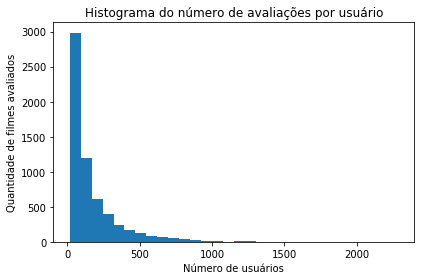

In [191]:
n, bins, patches = plt.hist(nb_users_movies,bins = 30)
plt.title("Histograma do número de avaliações por usuário")
plt.xlabel('Número de usuários')
plt.ylabel('Quantidade de filmes avaliados')
plt.tight_layout()

Na matriz de treinamento temos:

In [0]:
X_train_01 = matrix_01(X_train)
nb_users_movies = [sum(X_train_01[i,:]) for i in range(X_train_01.shape[0])]

In [0]:
print("Número mínimo de filmes: ",min(nb_users_movies))

Número mínimo de filmes:  14.0


In [0]:
print("Número máximo de filmes: ",max(nb_users_movies))

Número máximo de filmes:  1826.0


Na matriz de teste temos: 

In [0]:
X_test_01 = matrix_01(X_test)
nb_users_movies = [sum(X_test_01[i,:]) for i in range(X_test_01.shape[0])]

In [0]:
print("Número mínimo de filmes: ",min(nb_users_movies))

Número mínimo de filmes:  4.0


In [0]:
print("Número máximo de filmes: ",max(nb_users_movies))

Número máximo de filmes:  457.0


### Avaliações de um filme

Na matriz original temos:

In [0]:
uxm_matrix01 = matrix_01(uxm_matrix)
nb_movies_users = [sum(uxm_matrix01[:,i]) for i in range(uxm_matrix.shape[1])]

In [0]:
print("Número mínimo de usuários: ",min(nb_movies_users))

Número mínimo de usuários:  4.0


In [0]:
print("Número máximo de usuários: ",max(nb_movies_users))

Número máximo de usuários:  3428.0


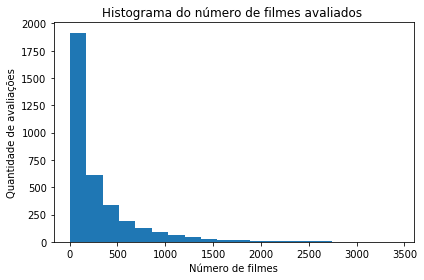

In [0]:
n, bins, patches = plt.hist(nb_movies_users,bins = 20)
plt.title("Histograma do número de filmes avaliados ")
plt.xlabel('Número de filmes')
plt.ylabel('Quantidade de avaliações')
plt.tight_layout()

Na matriz de treinamento temos:

In [0]:
X_train_01 = matrix_01(X_train)
nb_movies_users = [sum(X_train_01[:,i]) for i in range(X_train.shape[1])]

In [0]:
print("Número mínimo de usuários: ",min(nb_movies_users))

Número mínimo de usuários:  3.0


In [0]:
print("Número máximo de usuários: ",max(nb_movies_users))

Número máximo de usuários:  2743.0


Na matriz de teste temos:

In [0]:
X_test_01 = matrix_01(X_test)
nb_movies_users = [sum(X_test_01[:,i]) for i in range(X_test.shape[1])]

In [0]:
print("Número mínimo de usuários: ",min(nb_movies_users))

Número mínimo de usuários:  0.0


In [0]:
print("Número máximo de usuários: ",max(nb_movies_users))

Número máximo de usuários:  685.0


## A média/mediana como recomendação

Considere a média/mediana no conjunto de treinamento X_train. Apesar de simples, essas recomendações costumam errar pouco quando observamos o erro cometido no conjutno de testes X_test. Mesmo sendo exatamente idêntica para todos os usuários. Vejamos alguns exemplos. 

Primeiramente vamos calcular a média/mediana no conjunto de treinamento:

In [0]:
rec_mediana,rec_media = metrics_geral(X_train)

Selecione um usuário de 0 até 6039:

In [0]:
user = 500

Vamos calcular o erro cometido ao se utilizar rec_mediana e rec_media como recomendação:

In [0]:
row_test = X_test[user,:]
distance_mediana = distance(rec_mediana, row_test)
distance_media = distance(rec_media,row_test)
print("Erro ao se recomedar a média: %5.2f"%(distance_media))
print("Erro ao se recomedar a mediana: %5.2f"%(distance_mediana))

Erro ao se recomedar a média:  1.57
Erro ao se recomedar a mediana:  1.36


Repare que essa recomendação vale para todos os usuários! E mesmo assim o erro é pequeno. Altere você mesmo o usuário para verificar o erro cometido em outros casos.

Vamos gerar aleatoriamente uma lista de 100 usuários e calcular o erro cometido ao se utilizar a média ou a mediana como recomendação:

In [0]:
list_users = list(range(X_train.shape[0]))
random.shuffle(list_users)
list_user = list_users[:100]

erro_media=[]
erro_mediana=[]
for u in list_user:
  row_test = X_test[u,:]
  distance_mediana = distance(rec_mediana, row_test)
  distance_media = distance(rec_media,row_test)
  erro_media.append(distance_media)
  erro_mediana.append(distance_mediana)
  print("Usuário: %5d. Erro média: %5.2f.Erro mediana: %5.2f."%(u,distance_media, distance_mediana))
  
erro_media = np.mean(np.array(erro_media))
erro_mediana = np.mean(np.array(erro_mediana))

print("-"*80)

print("Erro médio da média: %5.2f. Erro médio da mediana: %5.2f."%(erro_media, erro_mediana))

Usuário:   597. Erro média:  0.53.Erro mediana:  0.88.
Usuário:  3233. Erro média:  0.69.Erro mediana:  0.75.
Usuário:   360. Erro média:  1.33.Erro mediana:  1.67.
Usuário:  5221. Erro média:  0.85.Erro mediana:  1.06.
Usuário:   717. Erro média:  0.61.Erro mediana:  0.74.
Usuário:    41. Erro média:  0.50.Erro mediana:  0.72.
Usuário:  5870. Erro média:  0.90.Erro mediana:  0.95.
Usuário:  5571. Erro média:  2.02.Erro mediana:  2.50.
Usuário:  1898. Erro média:  0.47.Erro mediana:  0.55.
Usuário:  2095. Erro média:  1.67.Erro mediana:  1.32.
Usuário:  1319. Erro média:  0.62.Erro mediana:  0.79.
Usuário:   859. Erro média:  1.45.Erro mediana:  1.67.
Usuário:  2181. Erro média:  0.20.Erro mediana:  0.40.
Usuário:  3853. Erro média:  0.38.Erro mediana:  0.41.
Usuário:  4669. Erro média:  1.10.Erro mediana:  1.38.
Usuário:  5040. Erro média:  1.01.Erro mediana:  1.22.
Usuário:  1849. Erro média:  0.76.Erro mediana:  0.95.
Usuário:  3104. Erro média:  0.91.Erro mediana:  1.25.
Usuário:  

Observação: caso você esteja utilizando o colab, ao clicar para executar novamente a célula anterior uma nova lista aleatória é gerada. Te convenci que a média é uma boa recomendação?  Caso pense em algum outro algoritmo de recomendação não se esqueça de verificar se ele é superior a média. Agora pense porque não utilizar a média como recomedação.

## Teste 0: fazendo a recomedação para um único usuário

O banco possui 6040 usuários, com índices indo de 0 até 6039 que podem ser utilizados para conferência do algoritmo.

Calculando a recomedação média:

In [0]:
_,mean_X_train = metrics_geral(X_train)

Selecionando um usuário entre 0 e 6039:

In [0]:
user = 5000

Número de avaliações desse usuário no conjunto de treinamento:

In [0]:
print(np.count_nonzero(X_train[user,:]))

180


Número de avaliações desse usuário no conjunto de teste:

In [0]:
print(np.count_nonzero(X_test[user,:]))

45


Fazendo a avaliação com os seguintes parâmetros:

Número mínimo de filmes necessários para se comparar dois usuários: 10

Número mínimo de avaliações em um grupo de usuários relacionados sobre um filme para fazer a recomendação: 3

Porcentagem do primeiro grupo em relação ao total: 0.1

Porcentagem do segundo grupo em relação ao total: 0.2

Porcentagem do terceiro grupo em relação ao total: 0.4


In [0]:
recomendacao = recomendation_row(user,X_train,10,3,0.1,0.2,0.3,mean_X_train)

Calculando o erro cometido ao se utilizar o algoritmo:

In [0]:
row1 = recomendacao
row2 = X_test[user,:]
print("Erro cometido: %3.2f."%(distance(row1,row2)))

Erro cometido: 0.78.


Mostrando lado a lado a recomendação feita pelo algoritmo comparada com a real avaliação no conjunto de teste:

In [0]:
row_test = X_test[user,:]

for index_movie in range(X_train.shape[1]):
  if row_test[index_movie]>0:
    print("Filme: %5d. Avaliação original: %3.2f. Recomendação: %3.2f."
          %(index_movie,row_test[index_movie], recomendacao[index_movie]))

Filme:     1. Avaliação original: 4.00. Recomendação: 3.78.
Filme:    28. Avaliação original: 5.00. Recomendação: 4.56.
Filme:   327. Avaliação original: 3.00. Recomendação: 3.58.
Filme:   329. Avaliação original: 3.00. Recomendação: 3.72.
Filme:   332. Avaliação original: 3.00. Recomendação: 4.20.
Filme:   333. Avaliação original: 5.00. Recomendação: 4.03.
Filme:   340. Avaliação original: 3.00. Recomendação: 4.19.
Filme:   475. Avaliação original: 3.00. Recomendação: 4.21.
Filme:   503. Avaliação original: 3.00. Recomendação: 4.00.
Filme:   504. Avaliação original: 5.00. Recomendação: 4.35.
Filme:   549. Avaliação original: 4.00. Recomendação: 4.33.
Filme:   763. Avaliação original: 5.00. Recomendação: 4.50.
Filme:   767. Avaliação original: 3.00. Recomendação: 4.56.
Filme:   775. Avaliação original: 4.00. Recomendação: 4.48.
Filme:   794. Avaliação original: 5.00. Recomendação: 3.89.
Filme:   807. Avaliação original: 4.00. Recomendação: 4.53.
Filme:   812. Avaliação original: 5.00. 

Teste com outros usuários você mesmo! Altere os parâmetros da recomendação e consiga um resultado melhor! Procure por usuários com diferentes avaliações e observe você mesmo a performance do algoritmo.

## Teste1: 100 usuários com mais avaliações

Criando a recomendação média baseada no conjunto de treinamento:

In [0]:
_,mean_X_train = metrics_geral(X_train)

Ordenando os usuários por número de filmes avaliados:

In [0]:
list_users = orderby_bestusers(X_train)

Aplicação do algoritmo nos cem usuários com mais avalições de filmes.
<br><br>

Parâmetros:

Lista de usuários testados = list_users[:100], que corresponde aos 100 usuários com mais avaliações no banco de dados.

Matriz para treinamento: X_train, com 80% das avaliações originais do banco.

Número mínimo para comparação entre dois usuários considerado: 10

Número de grupos: 3

Porcentagem do tamanho do grupo 1: 0.1

Porcentagem do tamanho do grupo 2: 0.2

Porcentagem do tamanho do grupo 3: 0.4

Recomendação da média calcula em X_train dada por: mean_X_train

Matriz para teste: X_test, com 20% das avaliações originais do banco


In [183]:
_,_,_=recomendation_listrows(
        list_users[:100],X_train,10,3,0.1,0.2,0.4,mean_X_train, X_test)

Em treinamento...
--------------------------------------------------------------------------------
Linha     0. Erro algoritmo:  0.60. Erro média:  0.62.
Linha     1. Erro algoritmo:  1.24. Erro média:  1.28.
Linha     2. Erro algoritmo:  0.44. Erro média:  0.77.
Linha     3. Erro algoritmo:  1.01. Erro média:  1.05.
Linha     4. Erro algoritmo:  0.83. Erro média:  1.18.
Linha     5. Erro algoritmo:  0.91. Erro média:  1.13.
Linha     6. Erro algoritmo:  0.50. Erro média:  0.69.
Linha     7. Erro algoritmo:  1.03. Erro média:  1.04.
Linha     8. Erro algoritmo:  0.92. Erro média:  1.60.
Linha     9. Erro algoritmo:  0.74. Erro média:  0.70.
Linha    10. Erro algoritmo:  1.12. Erro média:  1.44.
Linha    11. Erro algoritmo:  1.01. Erro média:  1.10.
Linha    12. Erro algoritmo:  0.49. Erro média:  0.50.
Linha    13. Erro algoritmo:  0.97. Erro média:  1.23.
Linha    14. Erro algoritmo:  0.57. Erro média:  0.87.
Linha    15. Erro algoritmo:  0.81. Erro média:  1.14.
Linha    16. Erro alg

## Teste2: 100 usuários escolhidos aleatoriamente

Criando a lista de todos os usuários do conjunto de treinamento:

In [0]:
list_users =list(range(X_train.shape[0]))


Embaralhando a lista dos usuários para escolher aleatoriamente:

In [0]:
random.shuffle(list_users)

Aplicação do algoritmo nos cem usuários com mais avalições de filmes.
<br><br>

Parâmetros:

Lista de usuários testados = list_users[:100], que corresponde a 100 usuários escolhidos aleatoriamente. 

Matriz para treinamento: X_train, com 80% das avaliações originais do banco.

Número mínimo para comparação entre dois usuários considerado: 10

Número de grupos: 3

Porcentagem do tamanho do grupo 1: 0.1

Porcentagem do tamanho do grupo 2: 0.2

Porcentagem do tamanho do grupo 3: 0.4

Recomendação da média calcula em X_train dada por: mean_X_train

Matriz para teste: X_test, com 20% das avaliações originais do banco

In [0]:
_,_,_=recomendation_listrows(
        list_users[:100],X_train,10,3,0.1,0.2,0.4,mean_X_train, X_test)

Em treinamento...
--------------------------------------------------------------------------------
Linha     0. Erro algoritmo:  0.78. Erro média:  0.77.
Linha     1. Erro algoritmo:  2.18. Erro média:  3.12.
Linha     2. Erro algoritmo:  0.74. Erro média:  0.90.
Linha     3. Erro algoritmo:  0.55. Erro média:  0.59.
Linha     4. Erro algoritmo:  1.20. Erro média:  1.29.
Linha     5. Erro algoritmo:  1.12. Erro média:  1.20.
Linha     6. Erro algoritmo:  1.39. Erro média:  0.90.
Linha     7. Erro algoritmo:  1.24. Erro média:  2.34.
Linha     8. Erro algoritmo:  0.67. Erro média:  0.68.
Linha     9. Erro algoritmo:  0.79. Erro média:  1.18.
Linha    10. Erro algoritmo:  1.16. Erro média:  1.40.
Linha    11. Erro algoritmo:  1.88. Erro média:  1.72.
Linha    12. Erro algoritmo:  0.51. Erro média:  0.70.
Linha    13. Erro algoritmo:  0.61. Erro média:  0.99.
Linha    14. Erro algoritmo:  0.53. Erro média:  0.63.
Linha    15. Erro algoritmo:  0.66. Erro média:  0.75.
Linha    16. Erro alg

## Observações sobre os testes:





1.   Tanto o erro calculado considerando a recomendação do algoritmo, como o calculado com a recomendação da média no conjunto de treinamento foram realizados utilizando a distância não usual mencionada anteriormente. Porém como as duas recomendações não possuem valor zero, a distância usual se equivale a distância proposta. 

2.   Coloquei lado a lado o erro do algoritmo com o erro da recomedação média para mostrar realmente que o algoritmo supera algo trivial como a média em boa parte dos casos. Sendo a média uma espécie de ponto de partida para mostrar que um algoritmo de recomendação está além do óbvio.

3. O fato de em alguns casos o algoritmo ser inferior a média não invalida a proposta do algoritmo, só mostra que nem todos os usuários podem ser avaliados pelos usuários semelhantes ao seu perfil. São os outliers que em todo tipo de algoritmo de recomendação estarão presentes. Um outro motivo para esse tipo de erro pode ser o número pequeno de comparações feitas no algoritmo.

4. Como nesses teste1 e teste2 não estou interessado na recomendação em si, mas apenas no erro do algoritmo e sua comparação com a média, omiti a matriz de recomendação. Se tiver interessado ness ponto vá ao teste0.

5.  No teste1, para os 100 usuários com mais avaliações a precisão foi muito boa, superando a média em 0.13 e em quase todas as linhas o algoritmo superou a recomendação da média. Isso se deve a grande quantidade de dados disponível.

6. No teste2, para os 100 usuários escolhidos aleatoriamente a precisão do algoritmo foi boa e superou a recomedação da média como resposta ao final, porém olhando linha por linha verificamos que em mais casos que no teste1, o algoritmo foi pior que a média.

7. Esses dois testes nos mostram que sim, é possível utilizar a semelhança entre usuários para captar o perfil de um usuário e fazer recomendações. 

8. Mesmo que o erro calculado na utilização do algoritmo não seja muito diferente da média, os resultados encontrados na literatura também não são muito distantes da média, além disso talvez mais importante que o erro em si, seja a ordenação dos filmes testados por usuário e essa ordenação vai ser muito diferente de um usuário para outro se utilizarmos o algorimo, ao contrário da recomendaçao da média.

9. Em comparação com o sistema de recomendação utilizando auto-encoders, o algoritmo proposto não precisa de nenhum treinamento prévio e pode ser feito para um único usuário instantaneamente. Porém como envolve muitas comparações leva mais tempo que a simples aplicação de uma rede neural em um vetor de avaliações.

#7. Objetivos futuros







1.   Aplicação do algoritmo em outros bancos
2.   Estudo dos melhores parâmetros a serem utilizados no algoritmo de acordo com as especificações do banco
3. Estudo dos melhores parâmetros a serem utilizados no algoritmo de acordo com as especificações do usuário
4. Otimização do processo de recomendação
5. Implementação de uma versão robusta do algoritmo proposto e de fácil utilização 
6. Comparação do tempo levado para recomendação utilizando o algoritmo proposto e outros algoritmos encontrados na literatura
7. Implementação de um programa interativo que dada uma avaliação de um usuário apresentada on-line recomenda novos filmes para esse usuário do banco de dados em questão.
8. Investigação de outros critérios para medir a precisão de algoritmos de recomendação.
9. Investigação da utilização de algoritmos de recomendação para outros processos diferentes de recomendação.

